# 1. PERKENALAN


**Nama  : Enggar Kristian** 

**Batch : FTDS - 011** 

**Dataset   : predictive_maintenance**

**Objective : Membuat model classification untuk memprediksi kegagalan dari dataset untuk digunakan prediksi preventive model.**

**Milestone 2** 




# 2. IMPORT LIBRARIES

In [973]:
!pip install -U imbalanced-learn
!pip install xgboost

Requirement already up-to-date: imbalanced-learn in c:\users\enggar\anaconda3\lib\site-packages (0.9.1)


In [974]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
import pickle
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline 
from collections import Counter

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error

# Evaluate Classification Models
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Censoring Outliers
from feature_engine.outliers import Winsorizer

# import gridsearchcv
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold



# 3. DATA LOADING

Tentang Kumpulan Data
Dataset Klasifikasi Machine Predictive Maintenance

Karena kumpulan data pemeliharaan prediktif nyata umumnya sulit diperoleh dan khususnya sulit untuk dipublikasikan, saya menyajikan dan menyediakan kumpulan data sintetis yang mencerminkan pemeliharaan prediktif nyata yang ditemui di industri sejauh pengetahuan saya.

Dataset terdiri dari 10.000 titik data yang disimpan sebagai baris dengan 14 fitur dalam kolom

- UID: pengidentifikasi unik mulai dari 1 hingga 10.000
- productID: terdiri dari huruf L, M, atau H untuk low (50% dari semua produk), medium (30%), dan high (20%) sebagai variasi kualitas produk dan nomor seri khusus varian
- Air Temperature [K]: dihasilkan menggunakan proses random walk kemudian dinormalisasi menjadi standar deviasi 2 K sekitar 300 K
- Process Temperature [K]: dihasilkan menggunakan proses jalan acak yang dinormalisasi ke standar deviasi 1 K, ditambahkan ke suhu udara ditambah 10 K.
- Rotational Speed [rpm]: dihitung dari daya 2860 W, dilapis dengan suara yang terdistribusi normal
- Torque [Nm]: nilai torsi terdistribusi secara normal sekitar 40 Nm dengan = 10 Nm dan tidak ada nilai negatif.
- Tool Wear [min]: Varian kualitas H/M/L menambahkan 5/3/2 menit tool wear ke tool yang digunakan dalam proses. dan
- label 'failure machine' yang menunjukkan, apakah mesin telah gagal dalam titik data khusus ini untuk salah satu mode kegagalan berikut adalah benar.

Penting : Ada dua Target - Jangan salah menggunakan salah satunya sebagai fitur, karena akan menyebabkan kebocoran.

    Target: Gagal atau Tidak
    Failure Type: Jenis-jenis Kegagalan

**Referensi**

UCI : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [975]:
data = pd.read_csv('predictive_maintenance.csv')

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [976]:
data.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [977]:
data.shape

(10000, 10)

Datanya sebesar 10000 baris dan 10 kolom

In [978]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


Ringkasan keseluruhan data

In [979]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Penjelasan informasi dari masing-masing kolom. 

In [980]:
# Salin data yang akan dimodifikasi
data_copy = data.copy() 

In [981]:
data_copy.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [982]:
# Rename Columns
data_copy.rename(columns = {'Air temperature [K]':'air_temperature',
       'Process temperature [K]':'process_temperature', 'Rotational speed [rpm]':'rotational_speed', 'Torque [Nm]':'torque',
       'Tool wear [min]':'tool_wear', 'Failure Type':'failure_type'}, inplace = True)

In [983]:
data_copy.head()

,UDI,Product ID,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# 4. EXPLORATORY DATA ANALYSIS (EDA)

Berhubung dataset ini tidak memiliki pengaruh sama sekali terhadap nama barangnya maka kolom UDI dan Product ID akan didrop

In [984]:
data_copy.drop(['UDI','Product ID'],axis=1,inplace=True)

In [985]:
sns.set_style('darkgrid')
data_copy.groupby(['Target','failure_type']).count().drop(['process_temperature',
                                                      'rotational_speed',
                                                     'torque',
                                                     'tool_wear',
                                                      'air_temperature'],axis=1)

Type
Target failure_type                  
0      No Failure                9643
       Random Failures             18
1      Heat Dissipation Failure   112
       No Failure                   9
       Overstrain Failure          78
       Power Failure               95
       Tool Wear Failure           45

metode groupby memungkinkan untuk membagi data berdasarkan kolom/kondisi ke dalam grup dan menerapkan fungsi/transformasi ke grup dan menggabungkan hasilnya menjadi output. Di sini, outputnya adalah jenis kegagalan dan jumlah dari setiap jenis kegagalan.

In [986]:
# Compute median of groups
data_copy.groupby(['Target','failure_type']).median()

air_temperature  process_temperature  \
Target failure_type                                                     
0      No Failure                         300.00                310.0   
       Random Failures                    300.75                311.1   
1      Heat Dissipation Failure           302.45                310.7   
       No Failure                         300.50                309.9   
       Overstrain Failure                 299.45                310.1   
       Power Failure                      300.40                310.2   
       Tool Wear Failure                  300.40                310.3   

                                 rotational_speed  torque  tool_wear  
Target failure_type                                                   
0      No Failure                          1507.0   39.80      107.0  
       Random Failures                     1490.0   44.60      142.0  
1      Heat Dissipation Failure            1346.0   52.35      106.0  
       No Failure                          1438.0   45.20      119.0  
       Overstrain Failure                  1362.5   56.75      207.0  
       Power Failure                       1386.0   63.60      100.0  
       Tool Wear Failure                   1521.0   37.70      215.0

Mengetahui nilai tengah dari setiap jenis kegagalan yang mana itu menjadi batas angka dari predictive maintenance dalam pemodelan.

In [987]:
data_copy.groupby(['Type','Target']).median()

air_temperature  process_temperature  rotational_speed  torque  \
Type Target                                                                   
H    0                 299.7                309.9              1502    40.2   
     1                 302.0                310.2              1371    53.8   
L    0                 300.1                310.1              1508    39.7   
     1                 301.2                310.4              1362    53.9   
M    0                 300.1                310.0              1506    40.0   
     1                 302.0                310.6              1372    51.6   

             tool_wear  
Type Target             
H    0             106  
     1             147  
L    0             107  
     1             182  
M    0             105  
     1             125

Mengetahui nilai tengah dari setiap jenis kualitas mesin yang mana itu menjadi batas angka dari predictive maintenance dalam pemodelan.

<AxesSubplot:xlabel='Target', ylabel='count'>

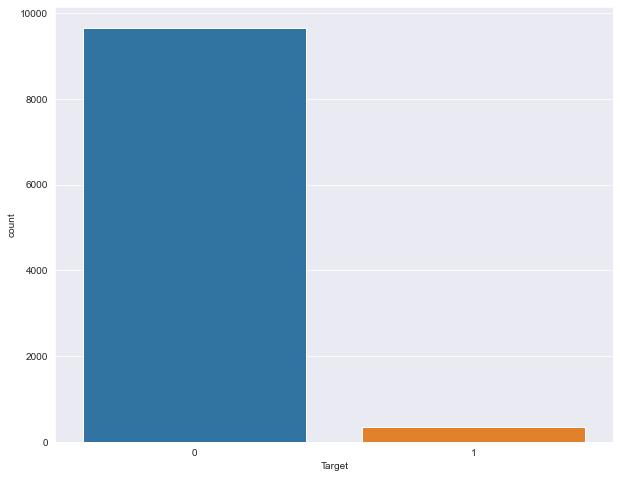

In [988]:
# Mengamati distribusi dari target "Target : Failure or not" dalam bar chart.
plt.figure(figsize=(10,8))
sns.countplot(data=data_copy,x="Target")

In [989]:
data_copy['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

<AxesSubplot:xlabel='failure_type', ylabel='count'>

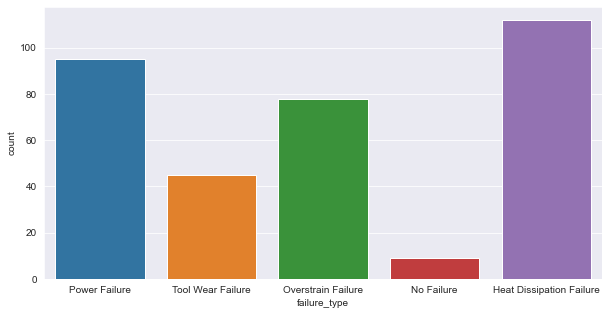

In [990]:
# Mengamati distribusi dari target "Target Failure Type : Type of Failure" dalam bar chart.
plt.figure(figsize=(10,5))
sns.countplot(data=data_copy[data_copy['Target']==1],x="failure_type")



In [991]:
data_copy['failure_type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: failure_type, dtype: int64

Terdapat keanehan pada grafik, yang mana grafik di atas merupakan unique Failure Type yang mana Target = 1 yang artinya mesin sedang mengalami kegagalan tetapi berjenis No Failure, kami tidak tahu alasannya kemungkinan ada kesalahan input. Tetapi jangan khawatir berhubung targetnya adalah kolom "Target" maka kolom "Feature Type" akan didrop agar menghindar dari kebocoran data.

In [992]:
# Mengamati distribution dari kegagalan dalam pie chart
import plotly.graph_objects as go 
import plotly.express as px 
fig = px.pie(data_copy, 
             title = 'Failure Types', 
             names = 'failure_type') 
fig.show()



Dataset sangat tidak seimbang dimana kegagalan mesin hanya terdiri dari 3,5% dari keseluruhan dataset. 

Sekarang, kita akan mencoba mengamati korelasi fitur tertentu dengan Jenis Kegagalan menggunakan Tabel Pivot pandas.

Tabel pivot mengambil data berdasarkan kolom sederhana sebagai input, dan mengelompokkan entri ke dalam tabel dua dimensi yang menyediakan ringkasan data multidimensi. Singkatnya, **PivotTable adalah cara interaktif untuk meringkas data dalam jumlah besar dengan cepat**.

In [993]:
# Korelasi Product ID dengan Failure
pd.pivot_table(data_copy,
               index   = 'failure_type', 
               columns = 'Type', 
               aggfunc ='count')



Target             air_temperature              \
Type                          H     L     M               H     L     M   
failure_type                                                              
Heat Dissipation Failure      8    74    30               8    74    30   
No Failure                  979  5757  2916             979  5757  2916   
Overstrain Failure            1    73     4               1    73     4   
Power Failure                 5    59    31               5    59    31   
Random Failures               4    12     2               4    12     2   
Tool Wear Failure             6    25    14               6    25    14   

                         process_temperature             rotational_speed  \
Type                                       H     L     M                H   
failure_type                                                                
Heat Dissipation Failure                   8    74    30                8   
No Failure                               979  5757  2916              979   
Overstrain Failure                         1    73     4                1   
Power Failure                              5    59    31                5   
Random Failures                            4    12     2                4   
Tool Wear Failure                          6    25    14                6   

                                     tool_wear             torque              
Type                         L     M         H     L     M      H     L     M  
failure_type                                                                   
Heat Dissipation Failure    74    30         8    74    30      8    74    30  
No Failure                5757  2916       979  5757  2916    979  5757  2916  
Overstrain Failure          73     4         1    73     4      1    73     4  
Power Failure               59    31         5    59    31      5    59    31  
Random Failures             12     2         4    12     2      4    12     2  
Tool Wear Failure           25    14         6    25    14      6    25    14

In [994]:
pd.pivot_table(data_copy,
               index   = 'Target', 
               columns = 'Type', 
               aggfunc ='count')

air_temperature             failure_type              \
Type                 H     L     M            H     L     M   
Target                                                        
0                  982  5765  2914          982  5765  2914   
1                   21   235    83           21   235    83   

       process_temperature             rotational_speed             tool_wear  \
Type                     H     L     M                H     L     M         H   
Target                                                                          
0                      982  5765  2914              982  5765  2914       982   
1                       21   235    83               21   235    83        21   

                   torque              
Type       L     M      H     L     M  
Target                                 
0       5765  2914    982  5765  2914  
1        235    83     21   235    83

Dari 2 tabel di atas, kita lihat bahwa kualitas Low paling banyak mengalami kegagalan dan kualitas High yang jarang mengalami kegagalan.

## Feature Selection

**Untuk melindungi dari kebocoran data, maka kolom Failure Type akan dihilangkan.**

In [995]:
data_copy.drop(data_copy.columns[-1],axis=1,inplace=True)
data_copy.head()

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


Mengubah kolom Type menjadi dummy per kolom dan merubahnya menjadi angka.

## Get Dummies approach

In [996]:
data_copy['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [997]:
data_copy = pd.get_dummies(data_copy,columns = ['Type'], prefix = ['Type'])
data_copy

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,1,0,0


# 5. DATA PREPROCESSING

In [999]:
# Get Data for Model Inference

random_state = 9
data_inf = data_copy.sample(100, random_state=random_state)
data_inf

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target,Type_H,Type_L,Type_M
3644,302.2,311.5,1548,32.4,81,0,0,1,0
9184,298.0,309.2,1665,36.6,22,0,0,1,0
520,297.6,309.5,1617,36.2,42,0,0,1,0
5685,302.2,311.5,1482,45.6,87,0,0,1,0
2401,299.2,308.6,1367,47.6,168,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4518,302.4,310.3,1480,45.8,123,0,0,1,0
3316,301.4,310.5,1217,60.6,103,0,0,0,1
2295,299.4,308.7,1512,37.2,126,0,0,1,0
4856,303.6,312.3,1698,31.3,100,0,0,0,1


In [1000]:
# Remove Inference-Set from Dataset

data_train_test = data_copy.drop(data_inf.index)
data_train_test

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,1,0,0


In [1001]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target,Type_H,Type_L,Type_M
0,302.2,311.5,1548,32.4,81,0,0,1,0
1,298.0,309.2,1665,36.6,22,0,0,1,0
2,297.6,309.5,1617,36.2,42,0,0,1,0
3,302.2,311.5,1482,45.6,87,0,0,1,0
4,299.2,308.6,1367,47.6,168,0,0,0,1
...,...,...,...,...,...,...,...,...,...
95,302.4,310.3,1480,45.8,123,0,0,1,0
96,301.4,310.5,1217,60.6,103,0,0,0,1
97,299.4,308.7,1512,37.2,126,0,0,1,0
98,303.6,312.3,1698,31.3,100,0,0,0,1


## Splitting Dataset

In [1002]:
# Split antara `X` (Features) dan `y` (Target)

X = data_train_test.drop('Target', axis=1)
y = data_train_test['Target']
y

0       0
1       0
2       0
3       0
4       0
       ..
9895    0
9896    0
9897    0
9898    0
9899    0
Name: Target, Length: 9900, dtype: int64

## SMOTE

Rebalancing imbalance data target

In [1068]:
smote=SMOTE(k_neighbors=2, random_state=random_state)
X_res,y_res =smote.fit_resample(X,y)

In [1069]:
X_res.shape,y_res.shape

((19132, 8), (19132,))

In [1070]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({0: 9566, 1: 334})
Resampled Dataset Shape Counter({0: 9566, 1: 9566})


Terlihat sudah direbalancing data target yang mana 50:50 jumlahnya, ini berguna untuk train pemodelan. Tetapi tidak untuk data set aslinya karna ini hanya rekayasa untuk pemodelan

In [1071]:
# Split antara Train-set dan Test-set

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=random_state)
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (15305, 8)
Test Size : (3827, 8)


Jika sudah displit dengan test_size = 0.2, dan random_state = 9, Maka akan didapatkan Train Size = 7920, 6 dan Test Size  = 1980, 6

## Handling Missing Value

In [1007]:
# Check Missing Values

X_train.isnull().sum()

air_temperature        0
process_temperature    0
rotational_speed       0
torque                 0
tool_wear              0
Type_H                 0
Type_L                 0
Type_M                 0
dtype: int64

In [1008]:
# Check Missing Values as Percentage to Total Data

X_train.isnull().mean()

air_temperature        0.0
process_temperature    0.0
rotational_speed       0.0
torque                 0.0
tool_wear              0.0
Type_H                 0.0
Type_L                 0.0
Type_M                 0.0
dtype: float64

Kebetulan data bersih tidak ada missing value

## Handling Outliers

### Identify variable distribution

In [1009]:
# Fungsi untuk membuat histogram dan boxplot
# Fungsi ini diambil dari dataframe (data) dan variable yang akan diambil nantinya.
# Hanya kolom numerik yang akan dihandling outliernya kali ini

def diagnostic_plots(data_train_test, variable):
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data_train_test[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=data_train_test[variable])
    plt.title('Boxplot')

    plt.show()

In [1010]:
X_train.columns

Index(['air_temperature', 'process_temperature', 'rotational_speed', 'torque',
       'tool_wear', 'Type_H', 'Type_L', 'Type_M'],
      dtype='object')

Distribusi air_temperature


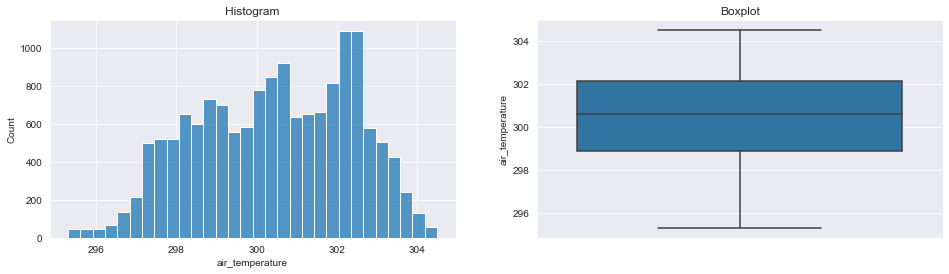

Skewness Value :  -0.2059915591893033

Distribusi process_temperature


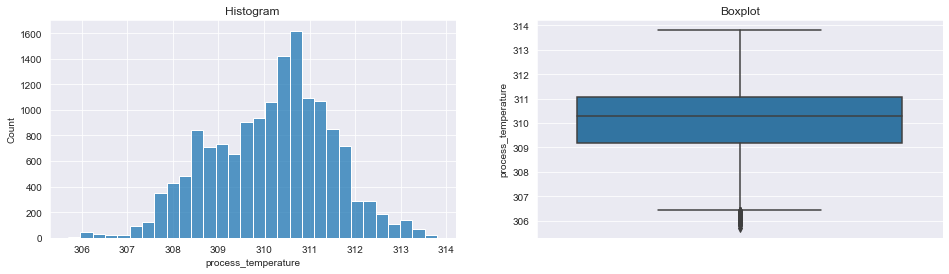

Skewness Value :  -0.21811563451337934

Distribusi rotational_speed


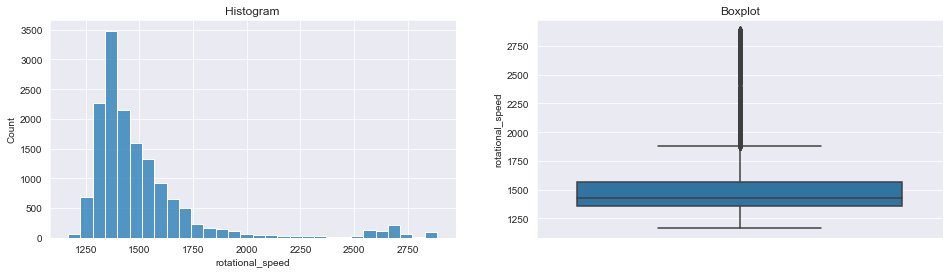

Skewness Value :  2.6966787122073383

Distribusi torque


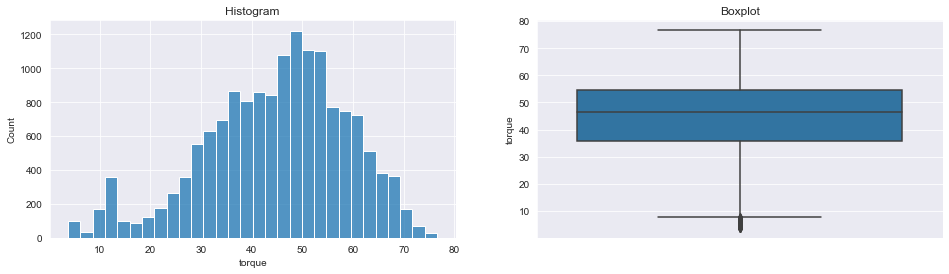

Skewness Value :  -0.502485049203374

Distribusi tool_wear


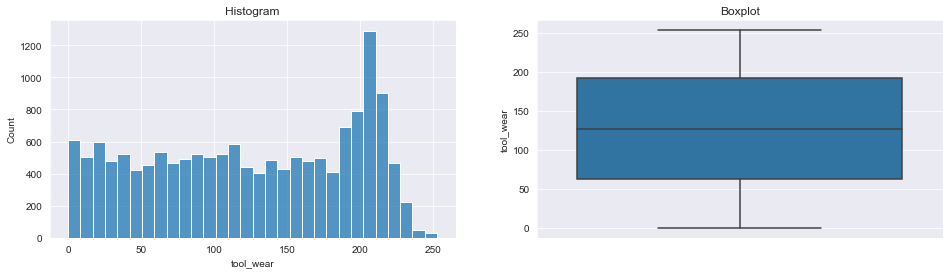

Skewness Value :  -0.15613571384727173

Distribusi Type_L


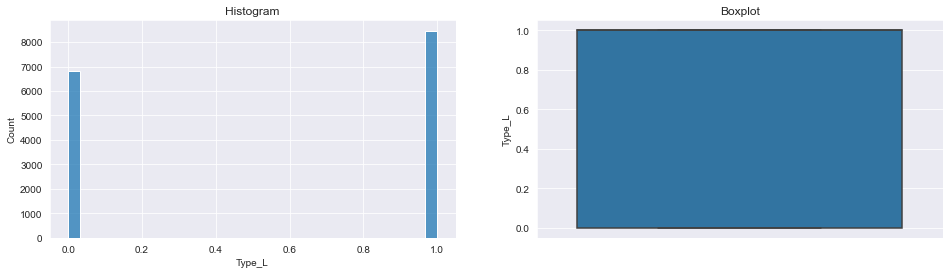

Skewness Value :  -0.21384282654292613

Distribusi Type_M


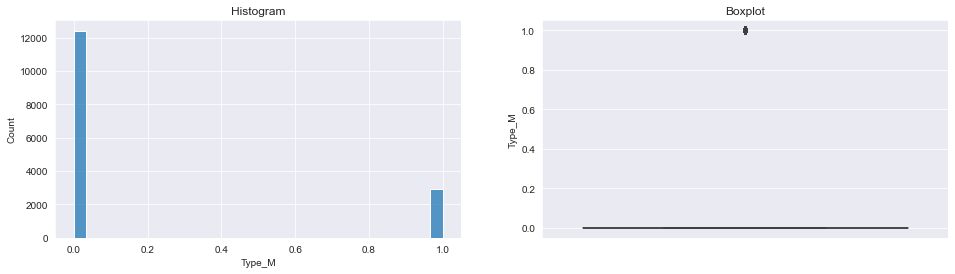

Skewness Value :  1.5870565175373377



In [1011]:
# Kolom numeriknya adalah age, education_num, capital_gain, capital_loss, hours_per_week  

cols = ['air_temperature', 'process_temperature',
       'rotational_speed', 'torque', 'tool_wear', 'Type_L',
       'Type_M']
for columns in cols:
    print(f'Distribusi {columns}')
    diagnostic_plots(X_train, columns)
    print('Skewness Value : ', X_train[columns].skew())
    print('')


In [1012]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])

In [1013]:
# Skew dist
print('skew_dist :', skew_dist)
print("__________"*20)
# normal_dist
print('normal_dist :',normal_dist)
print("__________"*20)

skew_dist : ['rotational_speed', 'torque', 'Type_H', 'Type_M']
________________________________________________________________________________________________________________________________________________________________________________________________________
normal_dist : ['air_temperature', 'process_temperature', 'tool_wear', 'Type_L']
________________________________________________________________________________________________________________________________________________________________________________________________________


Dari deteksi di atas yang terdistribusi skew hanya kolom 'Rotational speed [rpm]',  sementara untuk kolom 'Target' merupakan jenis kolom kategorikal object

### Tidak Handling Outliers

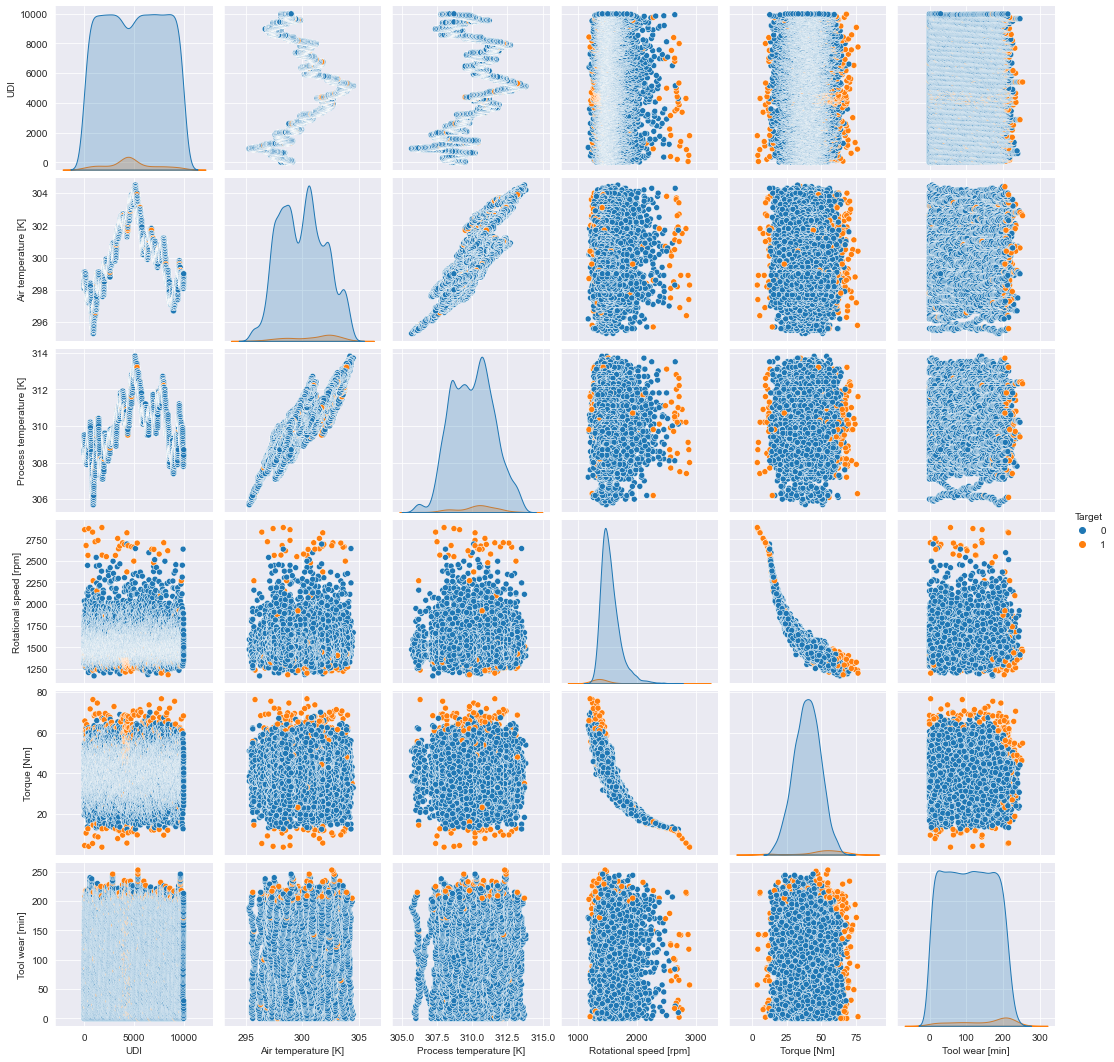

In [1014]:
sns.pairplot(data,hue='Target')

Target failure ditunjukkan pada titik berwarna **kuning** 

In [1015]:
fig = px.scatter_3d(data_copy, x='tool_wear', y='torque', z='rotational_speed',
              color='Target')
fig.show()

Dari 2 Grafik di atas menunjukkan bahwa data dari masing-masing pasangan data yang berbeda yang merupakan failure (scatter berwarna kuning) adalah data yang terendah ataupun data yang tertinggi yang mana tertinggi dan terendah merupakan outlier dari data tersbut. Maka dari itu untuk analisis ini tidak akan dilakukan handling outliers. 

## Split between Numerical Columns and Categorical Columns

In [1016]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Combines three categoy into one
final_features = num_columns + cat_columns

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear', 'Type_H', 'Type_L', 'Type_M']
Categorical Columns :  []


In [1017]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## Concate between Numerical Columns and Categorical Columns

In [1019]:
X_train_final = np.concatenate([X_train_num, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_cat], axis=1)

X_train_final

array([[3.00200000e+02, 3.11500000e+02, 1.54700000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.00397370e+02, 3.09879340e+02, 1.61500000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.97700000e+02, 3.09100000e+02, 1.73200000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.04200000e+02, 3.13000000e+02, 1.44200000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.03368619e+02, 3.12594770e+02, 2.70600000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.97700000e+02, 3.09300000e+02, 1.89300000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [1020]:
# Display as DataFrame

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+cat_columns])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns+cat_columns])
X_train_final_df

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Type_H,Type_L,Type_M
0,300.200000,311.500000,1547.0,40.900000,66.0,0.0,0.0,1.0
1,300.397370,309.879340,1615.0,31.182305,228.0,0.0,1.0,0.0
2,297.700000,309.100000,1732.0,28.100000,167.0,0.0,0.0,1.0
3,302.741993,311.969885,1257.0,71.167510,121.0,0.0,0.0,0.0
4,302.126837,311.512205,1444.0,47.629331,210.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
15300,303.000000,311.200000,1494.0,37.000000,67.0,0.0,1.0,0.0
15301,303.400000,311.800000,1366.0,50.900000,200.0,0.0,1.0,0.0
15302,304.200000,313.000000,1442.0,40.900000,23.0,1.0,0.0,0.0
15303,303.368619,312.594770,2706.0,9.798692,66.0,0.0,0.0,1.0


## Feature Scaling

In [1021]:
rs = RobustScaler()

Berhubung data tidak dihandling outliers dan ada data variabel distribusi skew maka digunakan RobustScaler
- Gunakan MinMaxScaler sebagai default 
- Gunakan RobustScaler jika Anda memiliki outlier dan dapat menangani rentang yang lebih besar
- Gunakan StandardScaler jika membutuhkan fitur yang dinormalisasi
- Gunakan Normalizer dengan hemat - ini menormalkan baris, bukan kolom

# 6 - Model Definition

**Algoritma**

Di projek ini Milestone 01 akan memakai berbagai macam algoritma antara lain:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. Decision Tree
4. Random Forest
5. K-Nearest Neighbors (KNN)
6. Naive Bayes
7. XGBoost

## Logistic Regression

In [1022]:
## Logistic Regression

# Initial Model with pipe
LR = LogisticRegression()

# Model with pipeline
pipe_lr = Pipeline([
    ('RobustScaler', rs),
    ('LR', LR)
])

# Hyper parameter
param_LR = {    
    'LR__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'LR__C' : np.logspace(-4, 4, 20),
    'LR__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'LR__max_iter' : [100, 1000,2500, 5000]
    }

pipe_lr

Pipeline(steps=[('RobustScaler', RobustScaler()), ('LR', LogisticRegression())])

## Support Vector Machine (SVM)

In [1023]:
# Initial Model with pipe
SVM = SVC()

# Model with pipeline
pipe_svm = Pipeline([
    ('RobustScaler', rs),
    ('SVM', SVM)
])

# Hyperparameter Tuning 
params_SVM = {    
    'SVM__C': [10, 100, 1000],
    'SVM__gamma': [1, 0.1, 0.01],
    'SVM__kernel': ['rbf']
    }

pipe_svm

Pipeline(steps=[('RobustScaler', RobustScaler()), ('SVM', SVC())])

## Decision Tree

In [1024]:
# Initial Model with pipe
DT = DecisionTreeClassifier()

# Model with pipeline
pipe_dt = Pipeline([
    ('RobustScaler', rs),
    ('DT', DT)
])


# Hyperparameter Tuning
params_DT = {
    'DT__criterion': ['gini', 'entropy'],
    'DT__max_depth': [None, 8, 16, 32],
    'DT__min_samples_split': [2, 4, 8, 16, 32, 64]
}

pipe_dt

Pipeline(steps=[('RobustScaler', RobustScaler()),
                ('DT', DecisionTreeClassifier())])

## Random Forest

In [1025]:
# Initial Model with pipe
RF = RandomForestClassifier()

# Model with pipeline
pipe_rf = Pipeline([
    ('RobustScaler', rs),
    ('RF', RF)
])
pipe_rf

# Hyperparameter Tuning
params_RF = {
    'RF__criterion': ['gini', 'entropy'],
    'RF__min_samples_split': [2, 4, 8, 16, 32, 64],
    'RF__max_features': ['auto', 'sqrt', 'log2']
}

pipe_rf

Pipeline(steps=[('RobustScaler', RobustScaler()),
                ('RF', RandomForestClassifier())])

## K-Nearest Neighbors (KNN)

In [1026]:
# Initial Model with pipe
KNN = KNeighborsClassifier()

# Model with pipeline
pipe_knn = Pipeline([
    ('RobustScaler', rs),
    ('KNN', KNN)
])

# Hyperparameter Tuning
params_KNN = {
    'KNN__n_neighbors' : range(1, 21, 2),
    'KNN__weights' : ['uniform', 'distance'],
    'KNN__metric' : ['euclidean', 'manhattan', 'minkowski']
}

pipe_knn

Pipeline(steps=[('RobustScaler', RobustScaler()),
                ('KNN', KNeighborsClassifier())])

## Naive Bayes

In [1027]:
# Initial Model with pipe
NB = GaussianNB()

# Model with pipeline
pipe_nb = Pipeline([
    ('RobustScaler', rs),
    ('NB', NB)
])

#Hyperparamter Tuning
params_NB = {'NB__var_smoothing': np.logspace(0,-9, num=100)}

pipe_nb

Pipeline(steps=[('RobustScaler', RobustScaler()), ('NB', GaussianNB())])

## XGBoost

In [1028]:
# Initial Model with pipe
XGB = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

# Model with pipeline
pipe_xgb = Pipeline([
    ('RobustScaler', rs),
    ('XGB', XGB)
])

# Hyperparameter Tuning
params_xgb = {
    'XGB__max_depth': range (2, 10, 1),
    'XGB__n_estimators': range(60, 220, 40),
    'XGB__learning_rate': [0.1, 0.01, 0.05] 
    }

pipe_xgb

Pipeline(steps=[('RobustScaler', RobustScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, enable_categorical=False,
                               gamma=None, gpu_id=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=600,
                               n_jobs=None, nthread=1, num_parallel_tree=None,
                               predictor=None, random_state=None,
                               reg_alpha=None, reg_lambda=None,
                               scale_pos_weight=None, silent=True,
                               subsample=None, tree_method=None,
                               validate_parameters=None, verbosity=None))])

# 7. MODEL TRAINING

Pemodelan training dari ke 7 Algoritma yang akan difit semua

## Training Cross Validation

In [1030]:

# persiapkan model algoritma ke dalam sebuah list
models = [pipe_lr, pipe_svm, pipe_dt, pipe_rf, pipe_knn, pipe_nb, pipe_xgb]

# Membuat list kosong untuk mengisi hasilnya
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate masing-masing model
for name, model in models:
    model.fit(X_train_final_df,y_train)
    scores = cross_val_score(model, X_train_final_df, y_train, scoring='recall_weighted', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':['LR', 'SVM', 'DT', 'RF', 'KNN', 'NB', 'XGB'], 'mean_score':mean_score, 'stdev_score':stdev_score})
# Training setiap model default
for model in models:
    print(model.fit(X_train_final_df,y_train))
    

# Predict setiap model
y_pred_train_lr = pipe_lr.predict(X_train_final_df)
y_pred_test_lr = pipe_lr.predict(X_test_final_df)
y_pred_train_svm = pipe_svm.predict(X_train_final_df)
y_pred_test_svm = pipe_svm.predict(X_test_final_df)
y_pred_train_dt = pipe_dt.predict(X_train_final_df)
y_pred_test_dt = pipe_dt.predict(X_test_final_df)
y_pred_train_rf = pipe_rf.predict(X_train_final_df)
y_pred_test_rf = pipe_rf.predict(X_test_final_df)
y_pred_train_knn = pipe_knn.predict(X_train_final_df)
y_pred_test_knn = pipe_knn.predict(X_test_final_df)
y_pred_train_nb = pipe_nb.predict(X_train_final_df)
y_pred_test_nb = pipe_nb.predict(X_test_final_df)
y_pred_train_xgb = pipe_xgb.predict(X_train_final_df)
y_pred_test_xgb = pipe_xgb.predict(X_test_final_df)


[02:28:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:28:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('RobustScaler', RobustScaler()), ('LR', LogisticRegression())])
Pipeline(steps=[('RobustScaler', RobustScaler()), ('SVM', SVC())])
Pipeline(steps=[('RobustScaler', RobustScaler()),
                ('DT', DecisionTreeClassifier())])
Pipeline(steps=[('RobustScaler', RobustScaler()),
                ('RF', RandomForestClassifier())])
Pipeline(steps=[('RobustScaler', RobustSc

## Training Grid Search

### Logistic Regression

In [1031]:
# Hyperparameter tuning Logistic Regression
grid_lr = GridSearchCV(
    pipe_lr, param_LR, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_final_df, y_train)

best_params_lr = grid_lr.best_params_
best_pipe_lr = grid_lr.best_estimator_
df_result_lr = pd.DataFrame.from_dict(grid_lr.cv_results_, orient='columns')


Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


In [1032]:
# Menampilkan parameter terbaik algoritma Logistic Regression
best_params_lr

{'LR__C': 0.23357214690901212,
 'LR__max_iter': 100,
 'LR__penalty': 'l1',
 'LR__solver': 'saga'}

Merujuk pada parameter terbaik di atas untuk algoritma Support Vector Machine:
- C = 0.0001
- max_iter = 100
- penalty = 'none'

### Support Vector Machine

In [1033]:
# Hyperparameter tuning Support Vector Machine
grid_svm = GridSearchCV(
    pipe_svm, params_SVM, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_final_df, y_train)

best_params_svm = grid_svm.best_params_
best_pipe_svm = grid_svm.best_estimator_
df_result_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [1034]:
# Menampilkan parameter terbaik algoritma Support Vector Machine
best_params_svm

{'SVM__C': 1000, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}

Merujuk pada parameter terbaik di atas untuk algoritma Support Vector Machine:
- C = 1000
- gamma = 1
- kernel = 'rbf'

### Decision Tree

In [1035]:
# Hyperparameter tuning Decision Tree
grid_dt = GridSearchCV(
    pipe_dt, params_DT, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_final_df, y_train)

best_params_dt = grid_dt.best_params_
best_pipe_dt = grid_dt.best_estimator_
df_result_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [1036]:
# Menampilkan parameter terbaik algoritma Decision Tree
best_params_dt

{'DT__criterion': 'entropy', 'DT__max_depth': None, 'DT__min_samples_split': 4}

Merujuk pada parameter terbaik di atas untuk algoritma Decision Tree:
- criterion = 'gini'
- max_depth = 16
- min_samples_split = 32

### Random Forest

In [1037]:
# Hyperparameter tuning Random Forest
grid_rf = GridSearchCV(
    pipe_rf, params_RF, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_final_df, y_train)

best_params_rf = grid_rf.best_params_
best_pipe_rf = grid_rf.best_estimator_
df_result_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [1038]:
# Menampilkan parameter terbaik algoritma Random Forest
best_params_rf

{'RF__criterion': 'entropy',
 'RF__max_features': 'log2',
 'RF__min_samples_split': 4}

Merujuk pada parameter terbaik di atas untuk algoritma Random Forest:
- criterion = 'entropy'
- max_features = 'sqrt'
- min_samples_split = 32

### K-Nearest Neighbor

In [1039]:
# Hyperparameter tuning K-Nearest Neighbor
grid_knn = GridSearchCV(
    pipe_knn, params_KNN, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_final_df, y_train)

best_params_knn = grid_knn.best_params_
best_pipe_knn = grid_knn.best_estimator_
df_result_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [1040]:
# Menampilkan parameter terbaik algoritma K-Nearest Neighbor
best_params_knn

{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1, 'KNN__weights': 'uniform'}

Merujuk pada parameter terbaik di atas untuk algoritma K-Nearest Neighbor:
- metric = 'euclidean'
- n_neighbors = 11
- weights = 'uniform'

### Naive Bayes

In [1041]:
# Hyperparameter tuning Naive Bayes
grid_nb = GridSearchCV(
    pipe_nb, params_NB, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_final_df, y_train)

best_params_nb = grid_nb.best_params_
best_pipe_nb = grid_nb.best_estimator_
df_result_nb = pd.DataFrame.from_dict(grid_nb.cv_results_, orient='columns')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


### XGBoost

In [1042]:
# Hyperparameter tuning Ridge Classifier
grid_xgb = GridSearchCV(
    estimator=pipe_xgb, param_grid=params_xgb, cv=5, scoring='roc_auc', n_jobs=5, verbose=True
).fit(X_train_final_df, y_train)

best_params_xgb = grid_xgb.best_params_
best_pipe_xgb = grid_xgb.best_estimator_
df_result_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[03:26:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:26:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [1043]:
# Menampilkan parameter terbaik algoritma Ridge Classifier
best_params_xgb

{'XGB__learning_rate': 0.1, 'XGB__max_depth': 9, 'XGB__n_estimators': 180}

# 8. MODEL EVALUATION

## Evaluasi Model Cross Validation

In [1044]:
# Showing the result of Cross Validation
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
3,RF,0.9805,0.0013
6,XGB,0.9793,0.0015
2,DT,0.9694,0.0029
4,KNN,0.9317,0.0031
0,LR,0.8719,0.0070
1,SVM,0.8281,0.0042
5,NB,0.7532,0.0049


Berdasarkan mean score Cross Validation nilai terbesar diperoleh oleh Random Forest dan dibawahnya ada XGBoost. Namun pada score Standar Deviasi yang mendekati 0 yatu XGBoost. 

## Logistic Regression

In [1045]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Logistic Regression) ====================')
print(roc_auc_score(y_train, best_pipe_lr.predict(X_train_final_df)))

print('==================== Test Results (Logistic Regression) ====================')
print(roc_auc_score(y_test, best_pipe_lr.predict(X_test_final_df)))

==================== Train Results (Logistic Regression) ====================
0.8848628291921619
==================== Test Results (Logistic Regression) ====================
0.8792724113056594


In [1046]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Logistic Regression) ====================')
print(classification_report(y_train, best_pipe_lr.predict(X_train_final_df)))

print('==================== Test Results (Logistic Regression) ====================')
print(classification_report(y_test, best_pipe_lr.predict(X_test_final_df)))

==================== Train Results (Logistic Regression) ====================
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7694
           1       0.90      0.87      0.88      7611

    accuracy                           0.88     15305
   macro avg       0.89      0.88      0.88     15305
weighted avg       0.89      0.88      0.88     15305

==================== Test Results (Logistic Regression) ====================
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1872
           1       0.89      0.87      0.88      1955

    accuracy                           0.88      3827
   macro avg       0.88      0.88      0.88      3827
weighted avg       0.88      0.88      0.88      3827



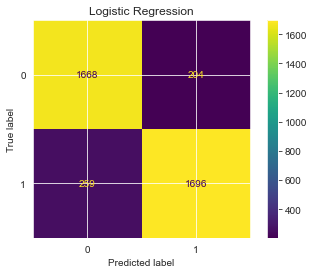

In [1047]:
cm = confusion_matrix(y_test, best_pipe_lr.predict(X_test_final_df), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("Logistic Regression")
plt.show()

Dilihat dari hasil di atas alagoritma Logistic Regression kurang menguasai dataset sehingga mendapat nilai yang tidak terlalu maksimal, tetapi cukup goodfit untuk perbedaaan Train dan Testnya, mari kita lihat algoritma berikutnya.

## Support Vector Machine (SVM)

In [1048]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Support Vector Machine) ====================')
print(roc_auc_score(y_train, best_pipe_svm.predict(X_train_final_df)))

print('==================== Test Results (Support Vector Machine) ====================')
print(roc_auc_score(y_test, best_pipe_svm.predict(X_test_final_df)))

==================== Train Results (Support Vector Machine) ====================
0.9934265223705705
==================== Test Results (Support Vector Machine) ====================
0.9777795538505257


In [1049]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Support Vector Machine) ====================')
print(classification_report(y_train, best_pipe_svm.predict(X_train_final_df)))

print('==================== Test Results (Support Vector Machine) ====================')
print(classification_report(y_test, best_pipe_svm.predict(X_test_final_df)))

==================== Train Results (Support Vector Machine) ====================
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7694
           1       0.99      1.00      0.99      7611

    accuracy                           0.99     15305
   macro avg       0.99      0.99      0.99     15305
weighted avg       0.99      0.99      0.99     15305

==================== Test Results (Support Vector Machine) ====================
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1872
           1       0.97      0.99      0.98      1955

    accuracy                           0.98      3827
   macro avg       0.98      0.98      0.98      3827
weighted avg       0.98      0.98      0.98      3827



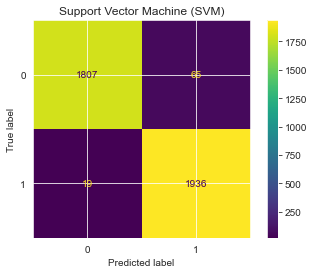

In [1050]:
cm = confusion_matrix(y_test, best_pipe_svm.predict(X_test_final_df), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("Support Vector Machine (SVM)")
plt.show()

Algoritma SVM dilihat dari hasil cukup goodfit dan memiliki nilai yang sangat baik dengan kata lain SVM mempelajari dataset dengan baik.

## Decision Tree

In [1051]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Decision Tree) ====================')
print(roc_auc_score(y_train, best_pipe_dt.predict(X_train_final_df)))

print('==================== Test Results (Decision Tree) ====================')
print(roc_auc_score(y_test, best_pipe_dt.predict(X_test_final_df)))

==================== Train Results (Decision Tree) ====================
0.9986896556387868
==================== Test Results (Decision Tree) ====================
0.976614176885916


In [1052]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Decision Tree) ====================')
print(classification_report(y_train, best_pipe_dt.predict(X_train_final_df)))

print('==================== Test Results (Decision Tree) ====================')
print(classification_report(y_test, best_pipe_dt.predict(X_test_final_df)))

==================== Train Results (Decision Tree) ====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7694
           1       1.00      1.00      1.00      7611

    accuracy                           1.00     15305
   macro avg       1.00      1.00      1.00     15305
weighted avg       1.00      1.00      1.00     15305

==================== Test Results (Decision Tree) ====================
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1872
           1       0.97      0.98      0.98      1955

    accuracy                           0.98      3827
   macro avg       0.98      0.98      0.98      3827
weighted avg       0.98      0.98      0.98      3827



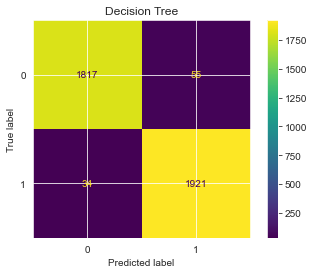

In [1053]:
cm = confusion_matrix(y_test, best_pipe_dt.predict(X_test_final_df), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("Decision Tree")
plt.show()

Algoritma Decision Tree dilihat dari hasil cukup goodfit dan memiliki nilai yang sangat baik dengan kata lain SVM mempelajari dataset dengan baik.

## Random Forest

In [1054]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Random Forest) ====================')
print(roc_auc_score(y_train, best_pipe_rf.predict(X_train_final_df)))

print('==================== Test Results (Random Forest) ====================')
print(roc_auc_score(y_test, best_pipe_rf.predict(X_test_final_df)))

==================== Train Results (Random Forest) ====================
0.9998693199071557
==================== Test Results (Random Forest) ====================
0.9817746245655453


In [1055]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Random Forest) ====================')
print(classification_report(y_train, best_pipe_rf.predict(X_train_final_df)))

print('==================== Test Results (Random Forest) ====================')
print(classification_report(y_test, best_pipe_rf.predict(X_test_final_df)))

==================== Train Results (Random Forest) ====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7694
           1       1.00      1.00      1.00      7611

    accuracy                           1.00     15305
   macro avg       1.00      1.00      1.00     15305
weighted avg       1.00      1.00      1.00     15305

==================== Test Results (Random Forest) ====================
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1872
           1       0.97      0.99      0.98      1955

    accuracy                           0.98      3827
   macro avg       0.98      0.98      0.98      3827
weighted avg       0.98      0.98      0.98      3827



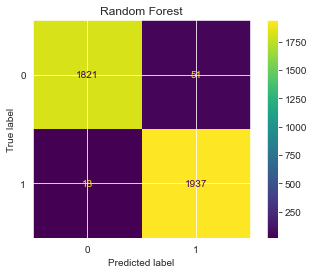

In [1056]:
cm = confusion_matrix(y_test, best_pipe_rf.predict(X_test_final_df), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("Random Forest")
plt.show()

Dilihat dari hasil Random Forest sangatlah bagus nilainya dan goodfit, memiliki eror yang lebih kecil dari algoritma lainnya.

## K-Nearest Neighbors (KNN)

In [1057]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (K-Nearest Neighbors (KNN)) ====================')
print(roc_auc_score(y_train, best_pipe_knn.predict(X_train_final_df)))

print('==================== Test Results (K-Nearest Neighbors (KNN)) ====================')
print(roc_auc_score(y_test, best_pipe_knn.predict(X_test_final_df)))

==================== Train Results (K-Nearest Neighbors (KNN)) ====================
1.0
==================== Test Results (K-Nearest Neighbors (KNN)) ====================
0.9797915710319802


In [1058]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (K-Nearest Neighbors (KNN)) ====================')
print(classification_report(y_train, best_pipe_knn.predict(X_train_final_df)))

print('==================== Test Results (K-Nearest Neighbors (KNN)) ====================')
print(classification_report(y_test, best_pipe_knn.predict(X_test_final_df)))

==================== Train Results (K-Nearest Neighbors (KNN)) ====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7694
           1       1.00      1.00      1.00      7611

    accuracy                           1.00     15305
   macro avg       1.00      1.00      1.00     15305
weighted avg       1.00      1.00      1.00     15305

==================== Test Results (K-Nearest Neighbors (KNN)) ====================
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1872
           1       0.97      1.00      0.98      1955

    accuracy                           0.98      3827
   macro avg       0.98      0.98      0.98      3827
weighted avg       0.98      0.98      0.98      3827



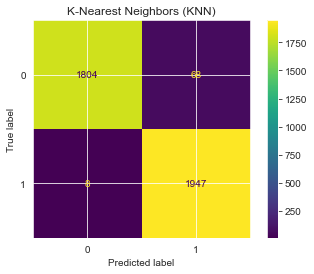

In [1059]:
cm = confusion_matrix(y_test, best_pipe_knn.predict(X_test_final_df), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("K-Nearest Neighbors (KNN)")
plt.show()

Dilihat dari hasil KNN di atas nilai cukup bagus, tetapi masing lebih besar nilai erornya dibanding Random Forest.

## Naive Bayes

In [1060]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Naive Bayes) ====================')
print(roc_auc_score(y_train, best_pipe_nb.predict(X_train_final_df)))

print('==================== Test Results (Naive Bayes) ====================')
print(roc_auc_score(y_test, best_pipe_nb.predict(X_test_final_df)))

==================== Train Results (Naive Bayes) ====================
0.862133424195488
==================== Test Results (Naive Bayes) ====================
0.8605531510262968


In [1061]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Naive Bayes) ====================')
print(classification_report(y_train, best_pipe_nb.predict(X_train_final_df)))

print('==================== Test Results (Naive Bayes) ====================')
print(classification_report(y_test, best_pipe_nb.predict(X_test_final_df)))

==================== Train Results (Naive Bayes) ====================
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7694
           1       0.85      0.87      0.86      7611

    accuracy                           0.86     15305
   macro avg       0.86      0.86      0.86     15305
weighted avg       0.86      0.86      0.86     15305

==================== Test Results (Naive Bayes) ====================
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1872
           1       0.86      0.87      0.86      1955

    accuracy                           0.86      3827
   macro avg       0.86      0.86      0.86      3827
weighted avg       0.86      0.86      0.86      3827



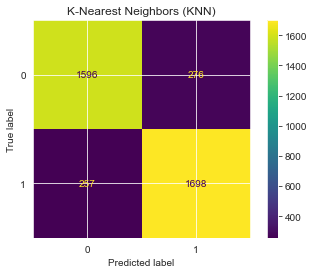

In [1062]:
cm = confusion_matrix(y_test, best_pipe_nb.predict(X_test_final_df), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("K-Nearest Neighbors (KNN)")
plt.show()

Dilihat dari hasil di atas Naive Bayes memiliki nilai kecil tetapi cukup goodfit.

## XGBoost

In [1063]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (XGBoost) ====================')
print(roc_auc_score(y_train, best_pipe_xgb.predict(X_train_final_df)))

print('==================== Test Results (XGBoost) ====================')
print(roc_auc_score(y_test, best_pipe_xgb.predict(X_test_final_df)))

==================== Train Results (XGBoost) ====================
1.0
==================== Test Results (XGBoost) ====================
0.9889067862373488


In [1064]:
# Performance Metrics Classification Report after grid
print('==================== Train Results (XGBoost) ====================')
print(classification_report(y_train, best_pipe_xgb.predict(X_train_final_df)))

print('==================== Test Results (XGBoost) ====================')
print(classification_report(y_test, best_pipe_xgb.predict(X_test_final_df)))

==================== Train Results (XGBoost) ====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7694
           1       1.00      1.00      1.00      7611

    accuracy                           1.00     15305
   macro avg       1.00      1.00      1.00     15305
weighted avg       1.00      1.00      1.00     15305

==================== Test Results (XGBoost) ====================
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1872
           1       0.98      0.99      0.99      1955

    accuracy                           0.99      3827
   macro avg       0.99      0.99      0.99      3827
weighted avg       0.99      0.99      0.99      3827



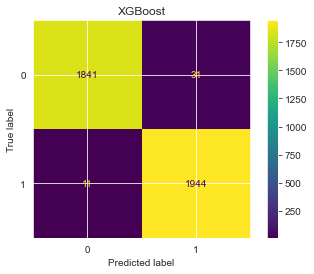

In [1065]:
cm = confusion_matrix(y_test, best_pipe_xgb.predict(X_test_final_df), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("XGBoost")
plt.show()

XGBoost sangat baik mempelajari dataset ini, memiliki nilai yang tinggi serta goodfit dan memiliki eror yang sangat kecil.

Maka dari itu dari 7 Algoritma yang ada, saya memilih 3 Algoritma yang akan disave dan dipakai untuk algoritma machine learning pada predictive maintenance ini antara lain:
- Random Forest
- SVM
- XGBoost

# 9. MODEL SAVING

Di dalam bab ini akan disimpan algoritmanya menggunakan joblib karena algoritma sudah menggunakan pipeline

In [1074]:
# SMOTE saving
with open('model_smote.pkl', 'wb') as file_1:
  pickle.dump(smote, file_1)

# Model Saving Random Forest
joblib.dump(pipe_rf, 'pipe_rf.joblib')

# Model Saving Support Vector Machine
joblib.dump(pipe_svm, 'pipe_svm.joblib')

# Model Saving XGBoost
joblib.dump(pipe_xgb, 'pipe_xgb.joblib')


['pipe_xgb.joblib']

# 10. MODEL INFERENCE

## Load Model

In [1075]:
# Load smote
with open('model_smote.pkl', 'rb') as file_1:
  model_smote = pickle.load(file_1)

# Load the pipelin from file algorithm Logistic Regression
pipe_rf = joblib.load('pipe_rf.joblib')

# Load the pipelin from file algorithm Support Vector Machine
pipe_svm = joblib.load('pipe_svm.joblib')

# Load the pipelin from file algorithm Decision Tree
pipe_xgb = joblib.load('pipe_xgb.joblib')

## Inferencing

In [1076]:
# Display `data_inf`

data_inf

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target,Type_H,Type_L,Type_M
0,302.2,311.5,1548,32.4,81,0,0,1,0
1,298.0,309.2,1665,36.6,22,0,0,1,0
2,297.6,309.5,1617,36.2,42,0,0,1,0
3,302.2,311.5,1482,45.6,87,0,0,1,0
4,299.2,308.6,1367,47.6,168,0,0,0,1
...,...,...,...,...,...,...,...,...,...
95,302.4,310.3,1480,45.8,123,0,0,1,0
96,301.4,310.5,1217,60.6,103,0,0,0,1
97,299.4,308.7,1512,37.2,126,0,0,1,0
98,303.6,312.3,1698,31.3,100,0,0,0,1


In [1077]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = data_inf.drop(['Target'], axis=1)

# use same variables in final features
X_inf = X_inf[final_features]

# y will be consist of target parameter only
y_inf = data_inf['Target']

# Rebalancing the data
X_inf_res, y_inf_res = smote.fit_resample(X_inf, y_inf)


In [1078]:
print(f"Orignal Dataset Shape {Counter(y_inf)}")
print(f"Resampled Dataset Shape {Counter(y_inf_res)}")

Orignal Dataset Shape Counter({0: 95, 1: 5})
Resampled Dataset Shape Counter({0: 95, 1: 95})


### Prediction

In [1079]:
# Determines prediction result
y_inf_pred_rf = best_pipe_rf.predict(X_inf_res)
y_inf_pred_svm = best_pipe_svm.predict(X_inf_res)
y_inf_pred_xgb = best_pipe_xgb.predict(X_inf_res)


### Evaluation

In [1080]:
# Evaluation for inference set
res_inf_rf = accuracy_score(y_inf_res, y_inf_pred_rf)
res_inf_svm = accuracy_score(y_inf_res, y_inf_pred_svm)
res_inf_xgb = accuracy_score(y_inf_res, y_inf_pred_xgb)

accuracy_conclusion = pd.DataFrame({'models':['RF', 'SVM', 'XGB'], 
                    'accuracy_score test':[res_inf_rf, res_inf_svm, res_inf_xgb]})
accuracy_conclusion.sort_values(by='accuracy_score test', ascending=True)

,models,accuracy_score test
0,RF,0.873684
2,XGB,0.884211
1,SVM,0.915789


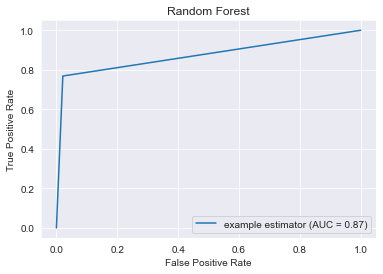

In [1081]:
# Plot ROC-AUC curve Random Forest
y = np.array(y_inf_res)
pred = np.array(y_inf_pred_rf)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.title('Random Forest')
plt.show()

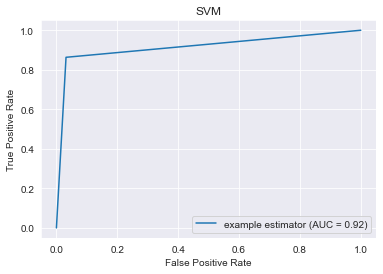

In [1082]:
# Plot ROC-AUC curve SVM
y = np.array(y_inf_res)
pred = np.array(y_inf_pred_svm)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.title('SVM')
plt.show()

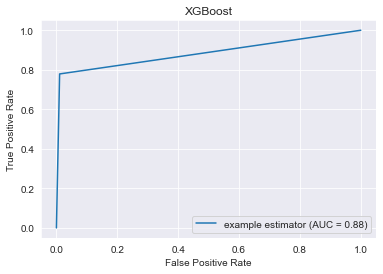

In [1083]:
# Plot ROC-AUC curve SVM
y = np.array(y_inf_res)
pred = np.array(y_inf_pred_xgb)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.title('XGBoost')
plt.show()

# 11 - Pengambilan Kesimpulan

Akhir dari analisis pada Predictive Maintenance yang menggunakan machine learning yang dipakai algoritma Random Forest, SVM, dan XGBoost mendapat nilai yang cukup baik dan berjalan dengan baik dengan data inference barunya. Nantinya machine learning ini berfungsi untuk Predictive Maintenance berikut ada beberapa wawasanya:

1. Apa itu Predictive Maintenance? 
    Adalah sebuah koondisi monitoring dan performa sebuah alat atau mesin yang sedang bekerja selama operasi normal, serta mengidentifikasi sebelum terjadinya failure, sehingga bisa dicegah dan diperbaikinya. Dengan kata lain predictive maintenance adalah sebuah otak censor yang mengeluarkan peringatan akan kesehatan mesin tersebut.

2. Apa fungsi dari Predictive Maintenance?
    - Melihat pengurangan dari waktu servis dengan tepat, caranya dengan langsung berinteraksi dengan mesin yang sedang sehat atau tidak melalu machine learning.
    - Meningkatkan keandalan mesin. 
    - Memperpanjang siklus umur atau penuaan pada mesin.
    - Predictive Maintenance mencoba prediksi ketika alat yang mungkin akan terjadi fail.

3. 
- Keuntungan Predictive Maintenance:
    1. Mmeminimalkan *downtime* yang tidak direncanakan dari aset misi-kritis.
    2. Mengurangi waktu yang dihabiskan untuk maintenance.
    3. Meningkatkan harapan hidup mesin dan peralatan.
    4. Mengurangi kerusakan mesin dan Kegagalan tak terduga.
    5. Meminimalkan biaya yang dikeluarkan untuk tenaga kerja, suku cadang, dan peralatan.
    6. Mengurangi stok suku cadang karena peningkatan masa pakai aset.
    7. Meningkatkan keselamatan di seluruh tempat kerja untuk teknisi dan operator

- Kerugian Predictive Maintenance:
    1. Perencanaan yang terperinci dan memakan waktu untuk memastikan pendekatan pemeliharaan ini diterapkan di setiap fasilitas dan merinci semua aset.
    2. Membeli peralatan pemantauan kondisi yang tepat yang dapat mengakibatkan biaya awal yang tinggi.
    3. Mempekerjakan staf terampil atau melatih tim pemeliharaan yang bisa mahal.

Referensi:
1. https://www.upkeep.com/learning/predictive-maintenance
2. https://educationleaves.com/what-is-predictive-maintenance/


In [1085]:
data['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

dilihat dari data imbalancen target failure masih sangat kurang dan kecil, kemungkinan juga model ini kurang optimal karena kurangnya data failure dibandingkan 0 = no failure, maka perlu dikaji ulang atau diriset kembali dan dikumpulkannya lebih banyak lagi data failure pada mesin.

URL:
- heroku: https://dashboard.heroku.com/apps/enggar-deployment-backend
- backend: http://127.0.0.1:5000/predict